* 사실 이번에 각 feature 별로 하나씩 확인하며 전처리하려고 했는데, 급하게 한다고 하나씩 확인은 하지 못했다.
* 이상치를 확인하고 이상치를 평균값으로 대체하는 것으로 진행하였는데, 확인해보니 이상치가 그대로였다....(?)
* 상관계수를 확인한 후 상관계수 절댓값이 낮은 것만 제거하였다. (1차시도에는 다중공선성을 확인하여 해당 feature도 제거했는데 이번에는 제거 안 함)
* 새로운 모델을 사용했는데, Catboost가 score 높게 나왔다.

# 0. 라이브러리 불러오기

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

---

# 1. 데이터 불러오기

## 1.1 train data

In [2]:
train = pd.read_csv('~/aiffel/airlines/train.csv')

train.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,target
0,1,Female,disloyal Customer,22,Business travel,Eco,1599,3,0,3,...,4,5,4,4,4,5,4,0,0.0,0
1,2,Female,Loyal Customer,37,Business travel,Business,2810,2,4,4,...,5,5,4,2,1,5,2,18,18.0,0
2,3,Male,Loyal Customer,46,Business travel,Business,2622,1,1,1,...,4,4,4,4,5,4,3,0,0.0,1
3,4,Female,disloyal Customer,24,Business travel,Eco,2348,3,3,3,...,3,2,4,5,3,4,3,10,2.0,0
4,5,Female,Loyal Customer,58,Business travel,Business,105,3,3,3,...,4,4,4,4,4,4,5,0,0.0,1


In [3]:
# id 컬럼 제거
train = train.drop('id', axis = 1)

In [4]:
train.shape

(3000, 23)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             3000 non-null   object 
 1   Customer Type                      3000 non-null   object 
 2   Age                                3000 non-null   int64  
 3   Type of Travel                     3000 non-null   object 
 4   Class                              3000 non-null   object 
 5   Flight Distance                    3000 non-null   int64  
 6   Seat comfort                       3000 non-null   int64  
 7   Departure/Arrival time convenient  3000 non-null   int64  
 8   Food and drink                     3000 non-null   int64  
 9   Gate location                      3000 non-null   int64  
 10  Inflight wifi service              3000 non-null   int64  
 11  Inflight entertainment             3000 non-null   int64

In [6]:
train.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
target                               0
dtype: int64

In [7]:
train.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,target
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,39.203000,1983.079333,2.863333,3.009667,2.874333,3.016667,3.259667,3.352333,3.50500,3.488000,3.497000,3.485000,3.728667,3.370000,3.728667,3.356333,15.634333,15.922000,0.556000
std,15.108802,1028.109117,1.394981,1.519543,1.431511,1.294713,1.322683,1.352826,1.31068,1.302211,1.283436,1.294218,1.154190,1.258158,1.161678,1.294057,45.083228,45.203411,0.496937
min,7.000000,52.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.00000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1348.250000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.00000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,39.000000,1937.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000,1.000000
75%,51.000000,2547.250000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.00000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000
max,80.000000,6882.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1128.000000,1115.000000,1.000000


## 1.2 test data

In [8]:
test = pd.read_csv('~/aiffel/airlines/test.csv')

test.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,Female,Loyal Customer,61,Personal Travel,Eco,2037,1,1,1,...,5,5,5,5,5,3,5,3,51,58.0
1,2,Female,disloyal Customer,27,Business travel,Business,1846,1,1,1,...,1,1,3,4,5,4,4,1,0,0.0
2,3,Female,Loyal Customer,52,Business travel,Business,1622,4,4,4,...,4,5,5,5,5,4,5,3,0,0.0
3,4,Male,Loyal Customer,54,Business travel,Business,3534,4,4,4,...,5,2,2,2,2,5,2,1,0,0.0
4,5,Female,Loyal Customer,41,Business travel,Eco,1471,4,3,3,...,4,4,3,1,2,5,4,4,0,0.0


In [9]:
test = test.drop('id', axis = 1)

In [10]:
test.shape

(2000, 22)

In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             2000 non-null   object 
 1   Customer Type                      2000 non-null   object 
 2   Age                                2000 non-null   int64  
 3   Type of Travel                     2000 non-null   object 
 4   Class                              2000 non-null   object 
 5   Flight Distance                    2000 non-null   int64  
 6   Seat comfort                       2000 non-null   int64  
 7   Departure/Arrival time convenient  2000 non-null   int64  
 8   Food and drink                     2000 non-null   int64  
 9   Gate location                      2000 non-null   int64  
 10  Inflight wifi service              2000 non-null   int64  
 11  Inflight entertainment             2000 non-null   int64

In [12]:
test.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

In [13]:
test.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000
mean,39.604500,1989.231500,2.898500,3.046500,2.900000,2.98200,3.218000,3.42550,3.478500,3.450500,3.499000,3.49750,3.701000,3.353000,3.703000,3.33700,12.105000,12.936500
std,15.061723,1046.961959,1.386059,1.509462,1.428993,1.31816,1.288529,1.32262,1.320382,1.289334,1.225459,1.27938,1.140723,1.260232,1.127576,1.30126,30.009636,30.843105
min,7.000000,50.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.00000,1.000000,1.000000,1.000000,0.00000,1.000000,1.000000,1.000000,1.00000,0.000000,0.000000
25%,27.000000,1379.250000,2.000000,2.000000,2.000000,2.00000,2.000000,2.00000,2.000000,2.000000,3.000000,2.00000,3.000000,3.000000,3.000000,2.00000,0.000000,0.000000
50%,40.000000,1961.500000,3.000000,3.000000,3.000000,3.00000,3.000000,4.00000,4.000000,4.000000,4.000000,4.00000,4.000000,3.000000,4.000000,3.50000,0.000000,0.000000
75%,51.000000,2564.250000,4.000000,4.000000,4.000000,4.00000,4.000000,4.00000,5.000000,4.000000,4.000000,5.00000,5.000000,4.000000,5.000000,4.00000,10.000000,12.000000
max,85.000000,6571.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.00000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.00000,448.000000,445.000000


## 1.3 target 데이터 balance 확인

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

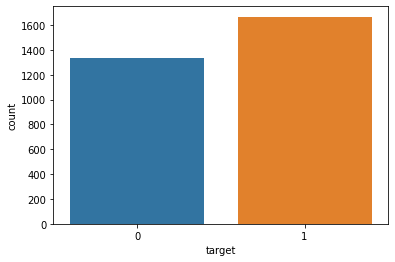

In [14]:
sns.countplot(train['target'])

---

# 2. feature 분석

In [15]:
category_1 = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'target']

category_2 = ['Seat comfort', 'Departure/Arrival time convenient', 'Food and drink', 'Gate location', 'Inflight wifi service', 'Inflight entertainment', 'Online support', 'Ease of Online booking', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding']

category_3 = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

In [16]:
def bar_plot(variable):
    
    var = train[variable]
    var_Value = var.value_counts()
    
    plt.figure(figsize = (10, 5))
    plt.bar(var_Value.index, var_Value.values, width=0.5, color = 'b', alpha = 0.5)
    
    plt.xlabel("Passenger Score")
    plt.ylabel('Frequency')
    plt.title(variable)
    plt.show()

In [17]:
def hist_plot(variable):
    
    plt.figure(figsize=(10, 3))
    plt.hist(train[variable], bins = 50)
    
    plt.xlabel(variable)
    plt.ylabel('Frequency')
    plt.title(variable)
    plt.show()

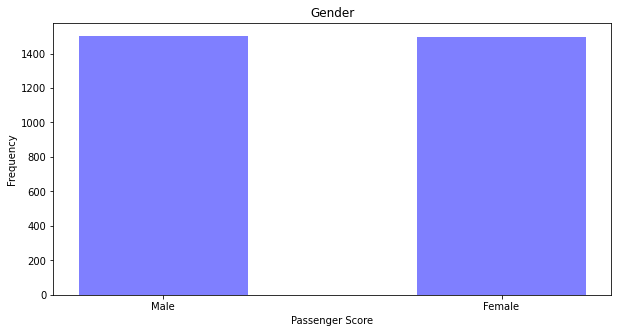

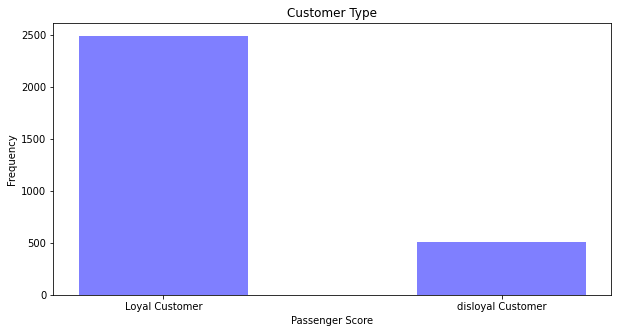

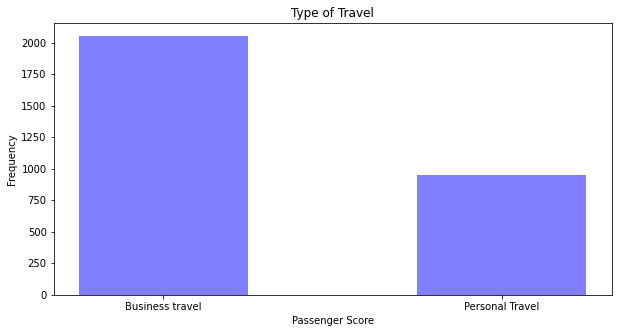

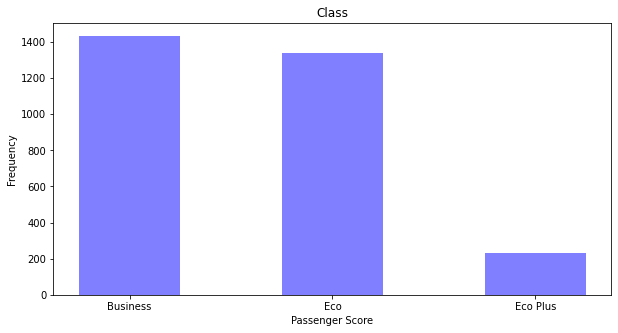

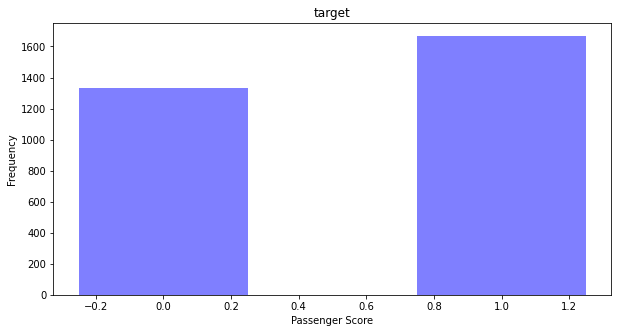

In [18]:
for i in category_1:
    bar_plot(i)

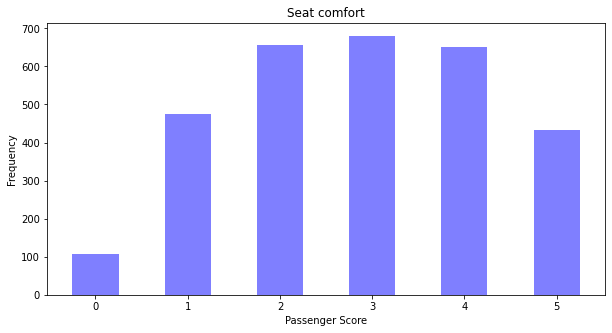

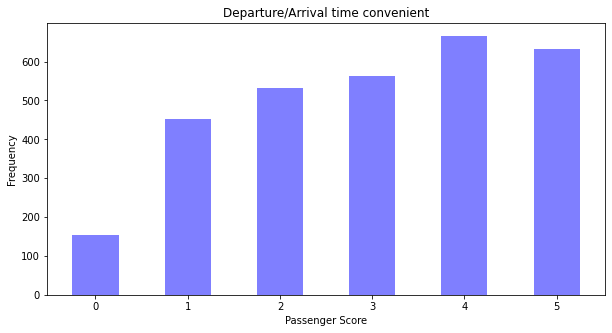

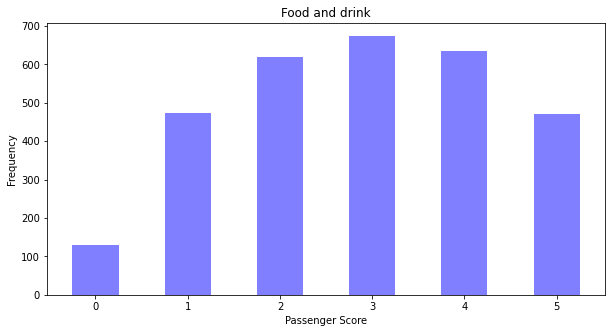

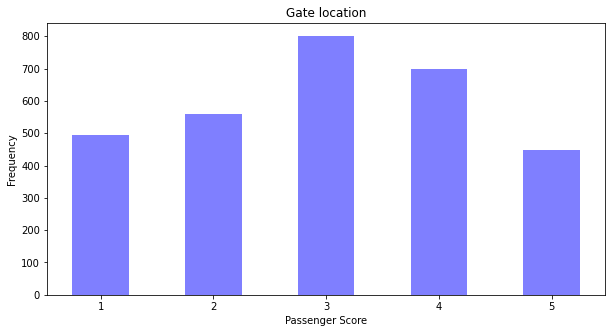

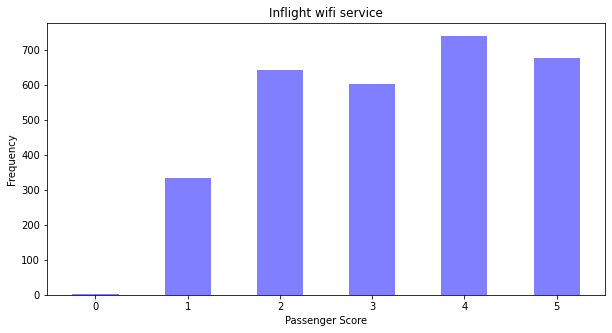

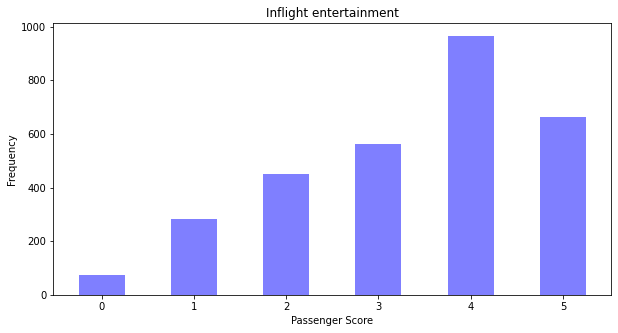

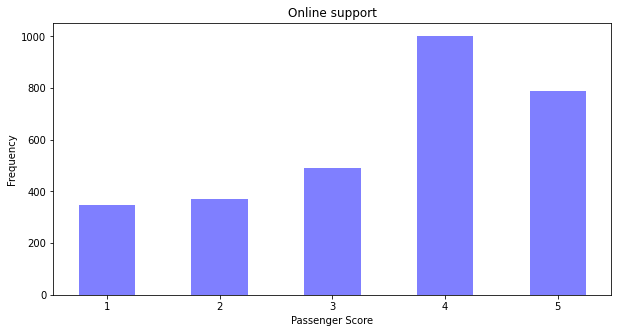

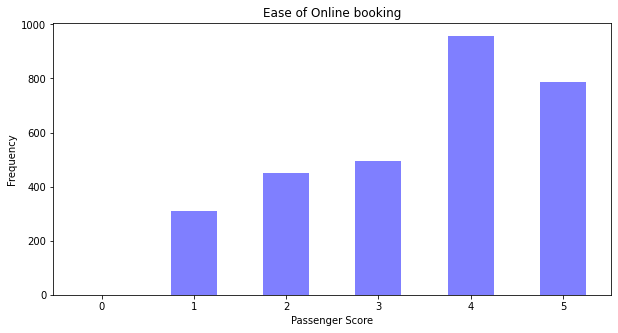

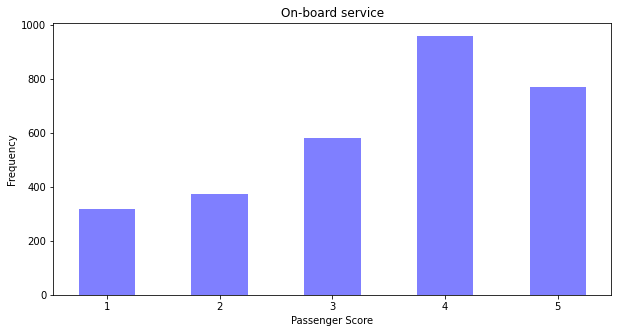

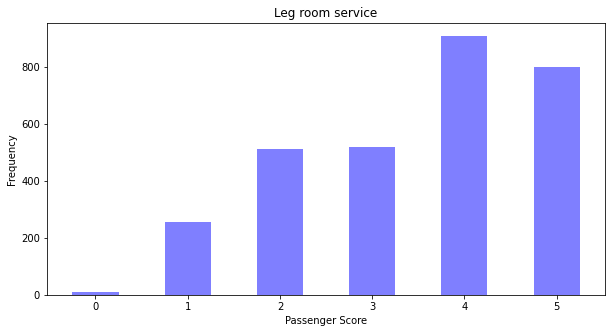

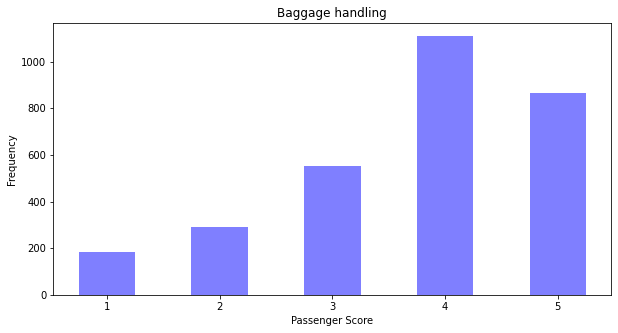

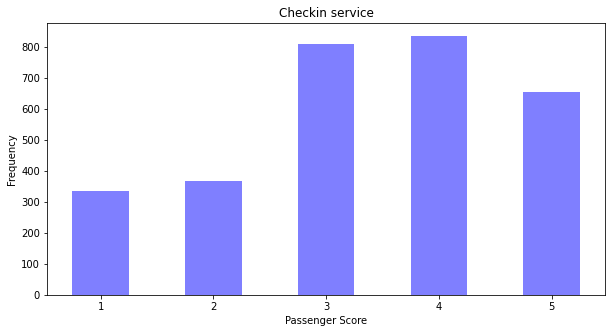

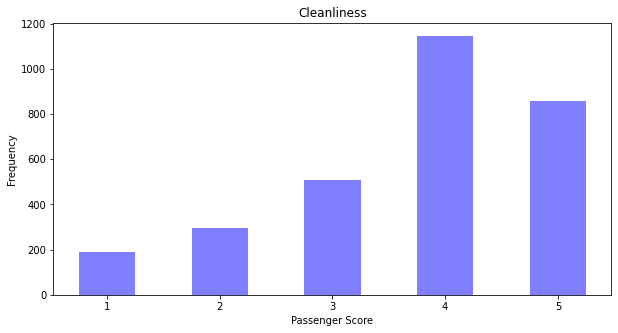

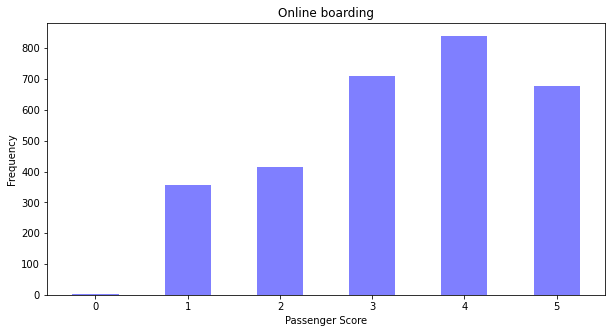

In [19]:
for i in category_2:
    bar_plot(i)

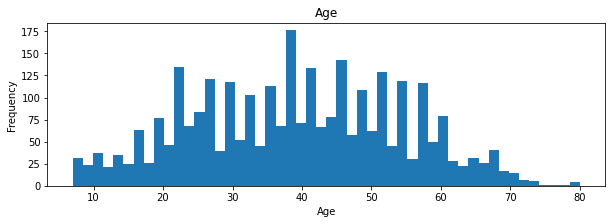

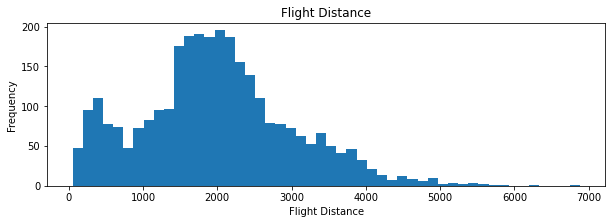

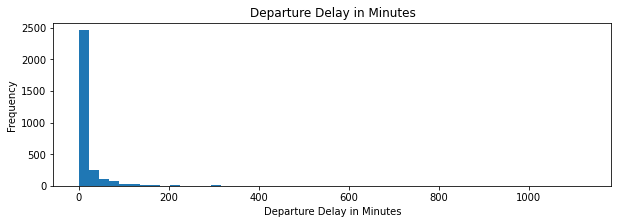

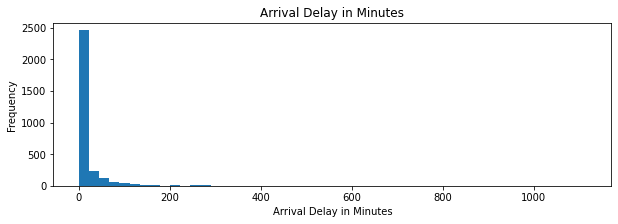

In [20]:
for i in category_3:
    hist_plot(i)

---

In [21]:
train[["Gender","target"]].groupby(["Gender"],as_index=False).mean().sort_values(by="target",ascending=False)

,Gender,target
0,Female,0.67223
1,Male,0.44008


In [22]:
train[["Customer Type","target"]].groupby(["Customer Type"],as_index=False).mean().sort_values(by="target",ascending=False)

,Customer Type,target
0,Loyal Customer,0.617115
1,disloyal Customer,0.258317


In [23]:
train[['Type of Travel',"target"]].groupby(['Type of Travel'],as_index=False).mean().sort_values(by="target",ascending=False)

,Type of Travel,target
0,Business travel,0.601072
1,Personal Travel,0.458289


In [24]:
train[['Class',"target"]].groupby(['Class'],as_index=False).mean().sort_values(by="target",ascending=False)

,Class,target
0,Business,0.711994
2,Eco Plus,0.441048
1,Eco,0.408377


---

# 3. 이상치 확인
* 이상치 처리가 되지 않은 것 같다...

In [25]:
numerical_features = train.columns[(train.dtypes=='int64') | (train.dtypes=='float')]
num_train = train[numerical_features]
num_train.columns

Index(['Age', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'target'],
      dtype='object')

In [26]:
# num_train.plot(kind = 'box', subplots = True, layout = (5, 5), figsize = (15, 20))
# plt.show()

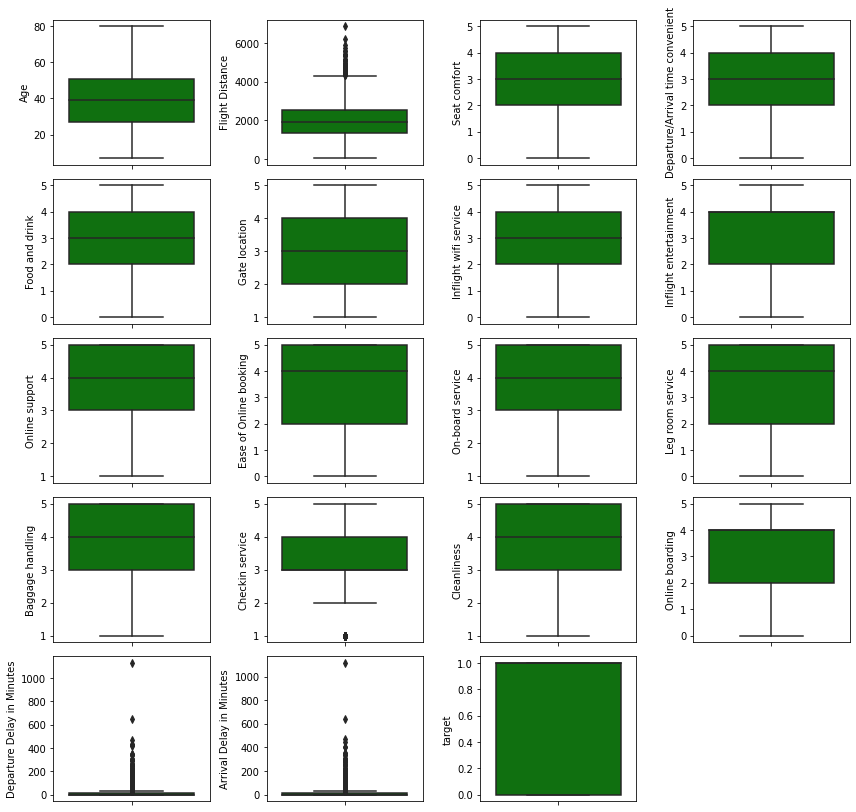

In [27]:
fig = plt.figure(figsize = (12, 20))

for i in range(len(num_train.columns)):
    fig.add_subplot(9,4, i+1)
    sns.boxplot(y = num_train.iloc[:, i], color = 'green')
    
plt.tight_layout()
plt.show()

In [28]:
def outliers_iqr(train):
    q1, q3 = np.percentile(train, [25, 75])
    
    iqr = q3 - q1
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    
    return np.where((train > upper_bound)|(train < lower_bound))

In [29]:
FlightDistance_outlier_index = outliers_iqr(train['Flight Distance'])[0]

In [30]:
CheckinService_outlier_index = outliers_iqr(train['Checkin service'])[0]

In [31]:
DepartureDelay_outlier_index = outliers_iqr(train['Departure Delay in Minutes'])[0]

In [32]:
ArrivalDelay_outlier_index = outliers_iqr(train['Arrival Delay in Minutes'])[0]

In [33]:
print(len(FlightDistance_outlier_index))

58


In [34]:
print(len(CheckinService_outlier_index))

334


In [35]:
print(len(DepartureDelay_outlier_index))

428


In [36]:
print(len(ArrivalDelay_outlier_index))

405


In [37]:
train.loc[FlightDistance_outlier_index, 'Flight Distance'] = train['Flight Distance'].mean()
train.loc[CheckinService_outlier_index, 'Checkin service'] = train['Checkin service'].mean()
train.loc[DepartureDelay_outlier_index, 'Departure Delay in Minutes'] = train['Departure Delay in Minutes'].mean()
train.loc[ArrivalDelay_outlier_index, 'Arrival Delay in Minutes'] = train['Arrival Delay in Minutes'].mean()

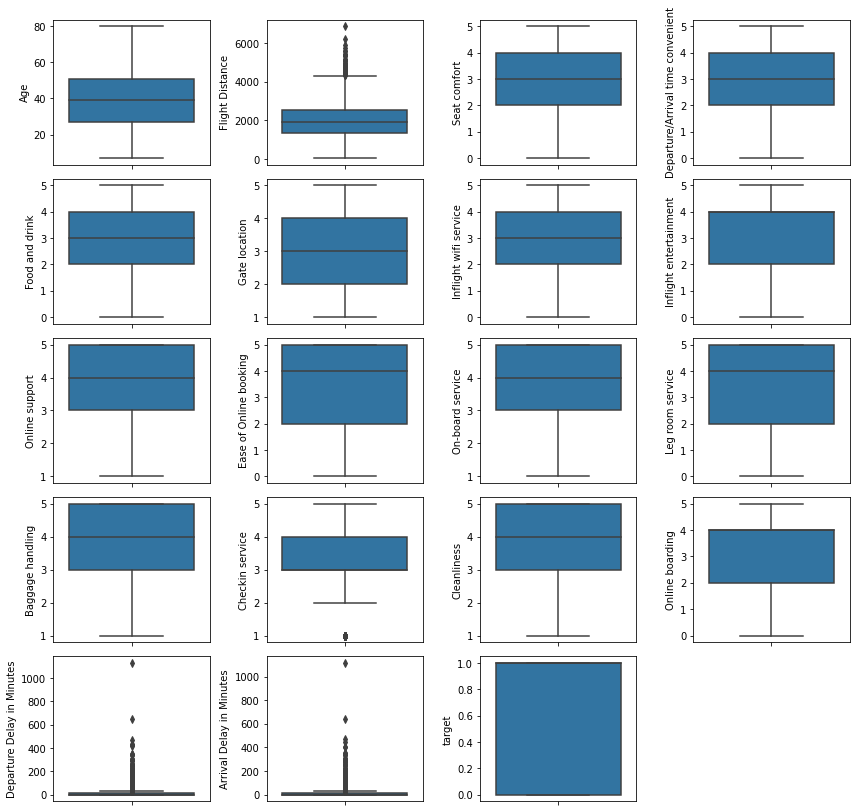

In [38]:
fig = plt.figure(figsize = (12, 20))

for i in range(len(num_train.columns)):
    fig.add_subplot(9,4, i+1)
    sns.boxplot(y = num_train.iloc[:, i])
    
plt.tight_layout()
plt.show()

---

# 4. Label Encoding

In [39]:
Gender_mapping = {'Female' : 1, 'Male' : 2}
train['Gender'] = train['Gender'].map(Gender_mapping)
test['Gender'] = test['Gender'].map(Gender_mapping)

Customer_type_mapping = {'disloyal Customer' : 1, 'Loyal Customer' : 2}
train['Customer Type'] = train['Customer Type'].map(Customer_type_mapping)
test['Customer Type'] = test['Customer Type'].map(Customer_type_mapping)

Type_of_Travel_mapping = {'Business travel' : 1, 'Personal Travel' : 2}
train['Type of Travel'] = train['Type of Travel'].map(Type_of_Travel_mapping)
test['Type of Travel'] = test['Type of Travel'].map(Type_of_Travel_mapping)

Class_mapping = {'Eco' : 1, 'Eco Plus' : 2, 'Business' : 3}
train['Class'] = train['Class'].map(Class_mapping)
test['Class'] = test['Class'].map(Class_mapping)

In [40]:
train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,target
0,1,1,22,1,1,1599.0,3,0,3,3,...,4,5,4,4,4.00,5,4,0.0,0.0,0
1,1,2,37,1,3,2810.0,2,4,4,4,...,5,5,4,2,3.37,5,2,18.0,18.0,0
2,2,2,46,1,3,2622.0,1,1,1,1,...,4,4,4,4,5.00,4,3,0.0,0.0,1
3,1,1,24,1,1,2348.0,3,3,3,3,...,3,2,4,5,3.00,4,3,10.0,2.0,0
4,1,2,58,1,3,105.0,3,3,3,3,...,4,4,4,4,4.00,4,5,0.0,0.0,1


In [41]:
test.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,2,61,2,1,2037,1,1,1,1,...,5,5,5,5,5,3,5,3,51,58.0
1,1,1,27,1,3,1846,1,1,1,4,...,1,1,3,4,5,4,4,1,0,0.0
2,1,2,52,1,3,1622,4,4,4,4,...,4,5,5,5,5,4,5,3,0,0.0
3,2,2,54,1,3,3534,4,4,4,4,...,5,2,2,2,2,5,2,1,0,0.0
4,1,2,41,1,1,1471,4,3,3,3,...,4,4,3,1,2,5,4,4,0,0.0


---

# 5. target과 feature 간 상관계수 확인

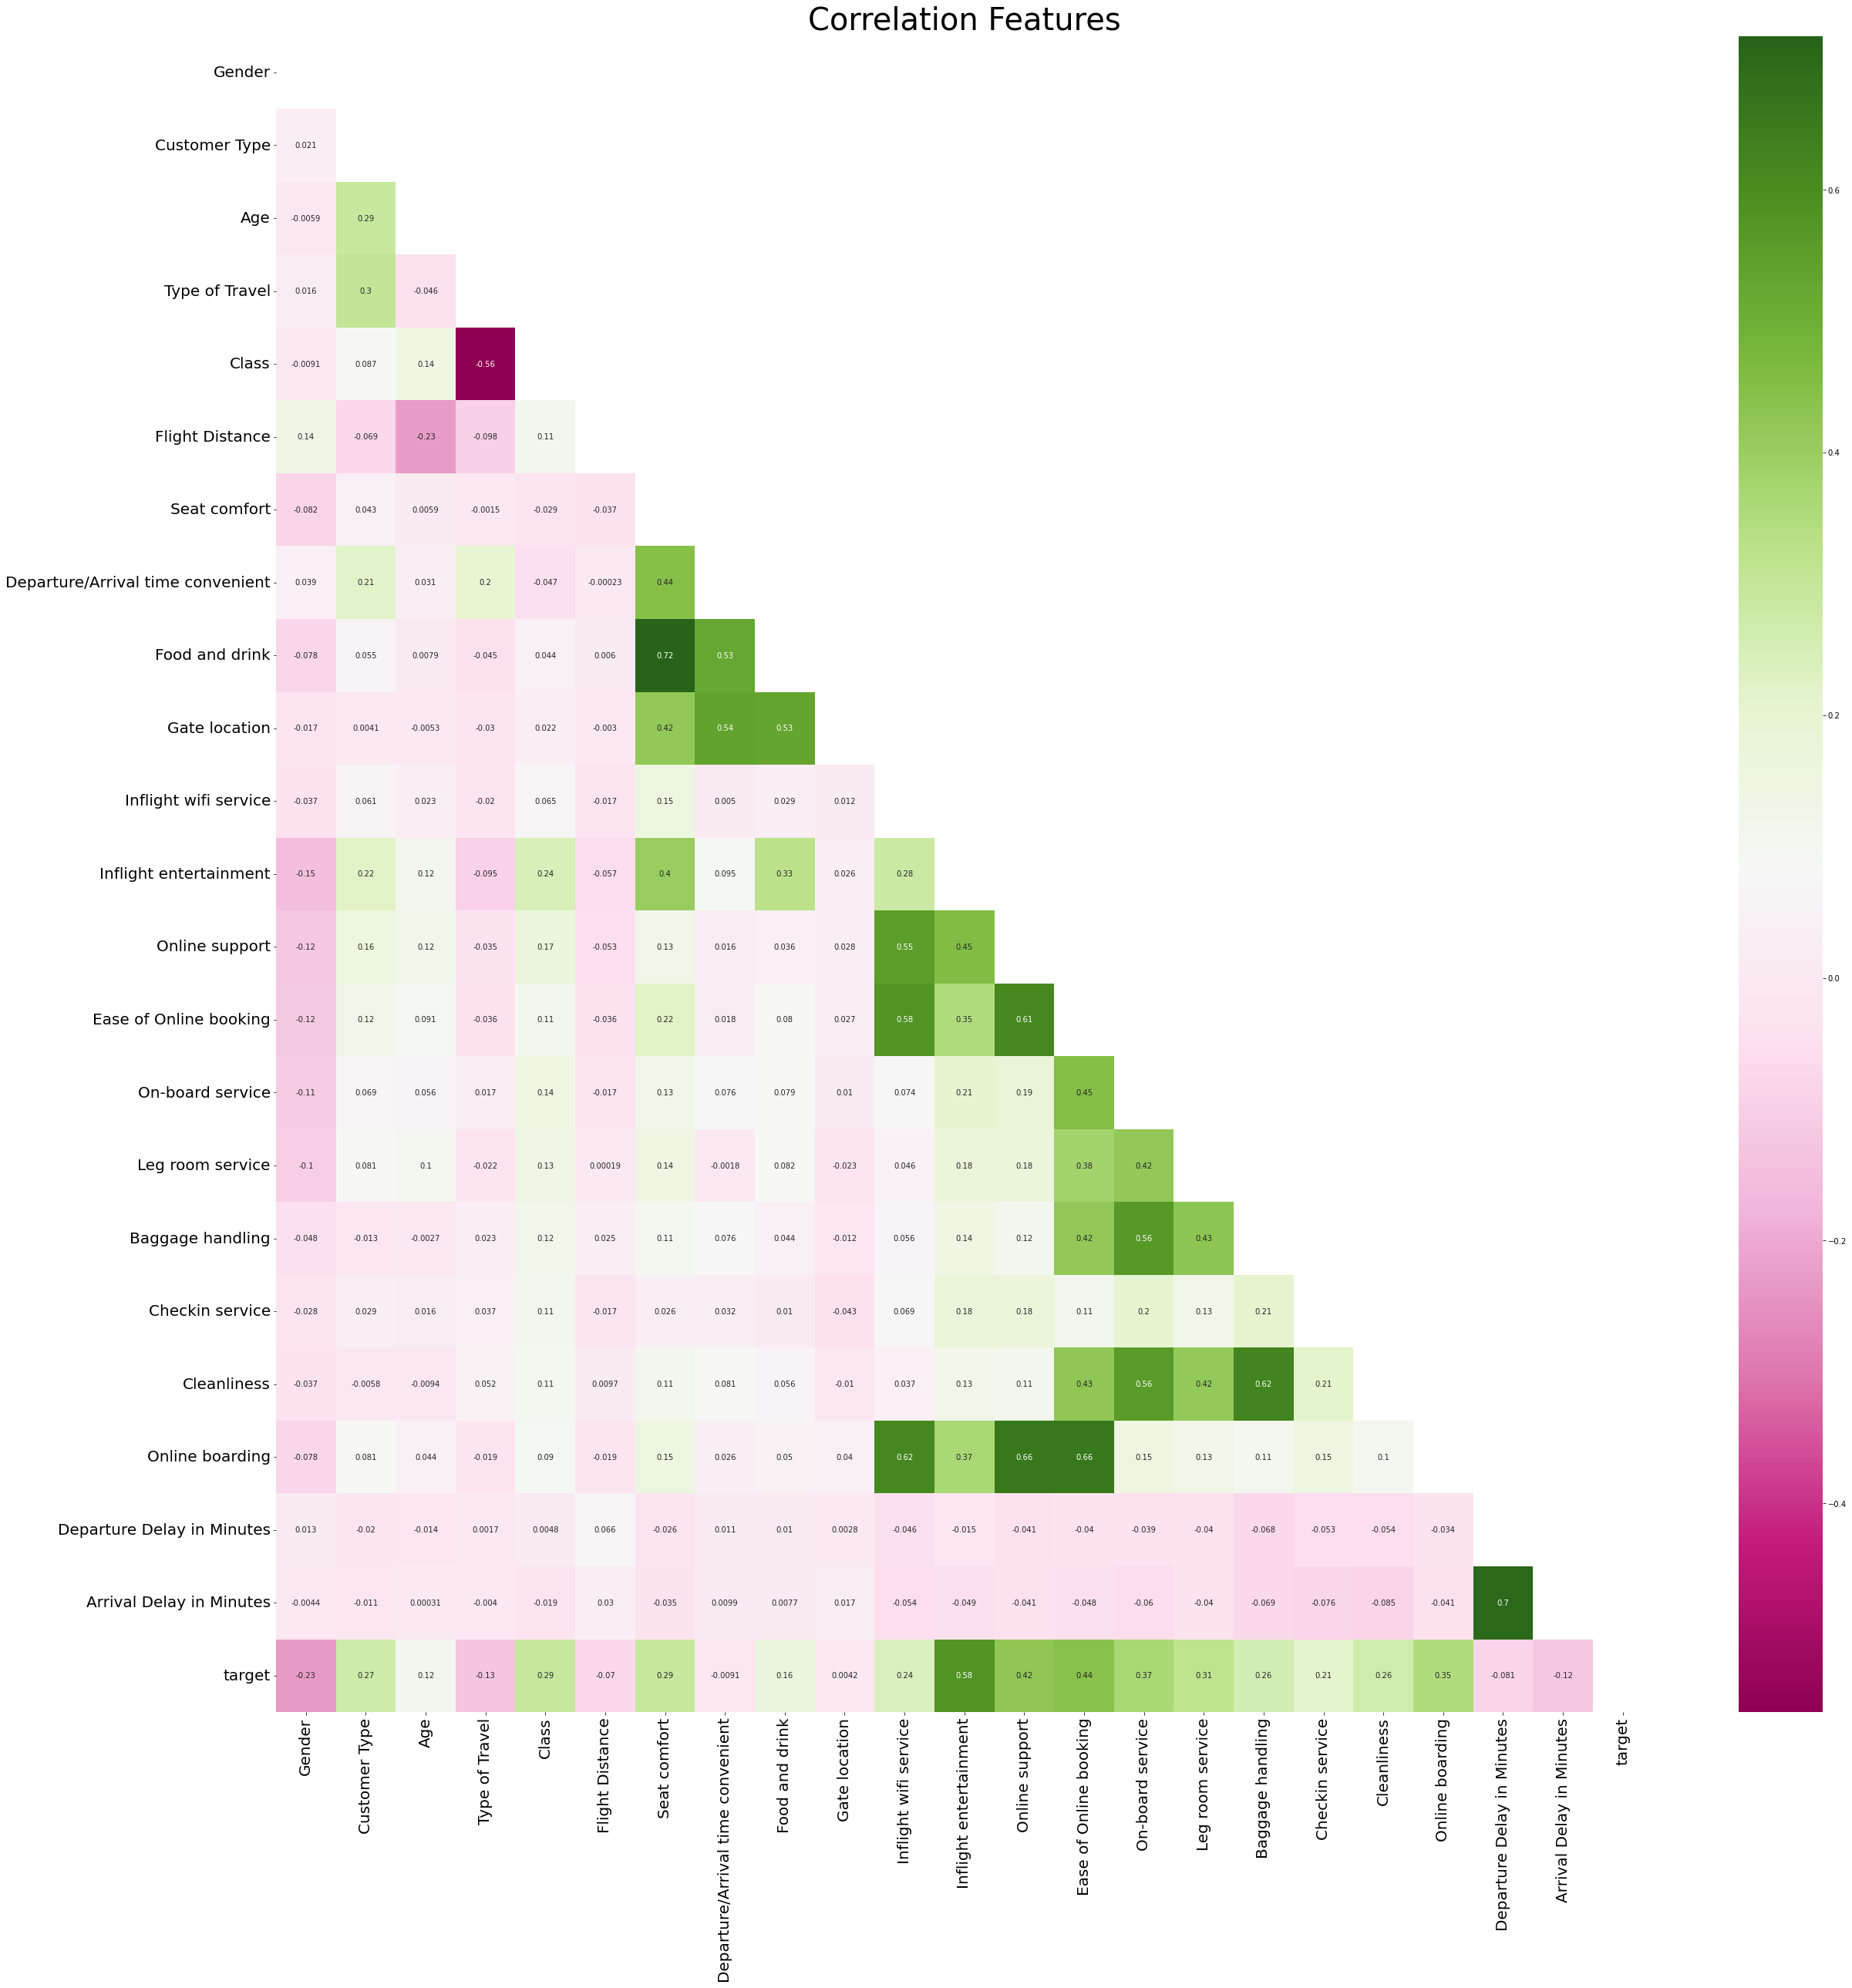

In [42]:
plt.figure(figsize = (40,40))

heat_table = train.corr(method = 'spearman')
mask = np.zeros_like(heat_table)
mask[np.triu_indices_from(mask)] = True

heatmap = sns.heatmap(heat_table, 
            annot=True,    # 실제 값을 표시
            cmap="PiYG",   # 색상
            mask = mask)   # 표시하지 않을 마스크 부분을 지정함

heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=20)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=20)

plt.title("Correlation Features", fontsize=40)
plt.show()

* target과 상관이 높은 feature : Infight entertainment(0.58), Online support(0.42), Ease of Online booling(0.44), On-board service(0.37), Online boarding(0.35)
* target과 상관이 낮은 feature : Age(0.12), Type of Travel(-0.13), Departure/Arrival time convenient(-0.0091), Food and drink (0.16), Gate location(0.0042), Departure Delay in Minutes(-0.097), Arrival Delay in Minuetes(-0.14)

---

# 6. 불필요한 feature 제거

In [43]:
train.drop('Departure/Arrival time convenient', axis = 1, inplace = True)
train.drop('Gate location', axis = 1, inplace = True)

train.drop('Departure Delay in Minutes', axis = 1, inplace = True)

test.drop('Departure/Arrival time convenient', axis = 1, inplace = True)
test.drop('Gate location', axis = 1, inplace = True)
test.drop('Departure Delay in Minutes', axis = 1, inplace = True)

In [44]:
train.shape, test.shape

((3000, 20), (2000, 19))

----

# 7. 모델 학습

In [45]:
X = train.drop('target', axis = 1)
y = train['target']

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)

print('train 데이터 크기 : ', X_train.shape)
print('train 레이블 크기 : ', y_train.shape)
print('-----------------------')
print('test 데이터 크기 : ', X_test.shape)
print('test 레이블 크기 : ', y_test.shape)

train 데이터 크기 :  (2400, 19)
train 레이블 크기 :  (2400,)
-----------------------
test 데이터 크기 :  (600, 19)
test 레이블 크기 :  (600,)


## 1) Random Forest

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

random_forest = RandomForestClassifier(random_state = 32)

random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)

## 2) xboost

In [48]:
import xgboost as xgb

model_xgb = xgb.XGBClassifier()

model_xgb.fit(X_train, y_train)
y_pred_xgb = model_xgb.predict(X_test)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[06:30:07] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


## 3) LightGBM

In [49]:
import lightgbm as lgb

model_lgb = lgb.LGBMClassifier()

model_lgb.fit(X_train, y_train)
y_pred_lgb = model_lgb.predict(X_test)

accuracy_lgb = accuracy_score(y_test, y_pred_lgb)

## 4) Catboost

In [50]:
import catboost as cat

model_cat = cat.CatBoostClassifier()

model_cat.fit(X_train, y_train)
y_pred_cat = model_cat.predict(X_test)

accuracy_cat = accuracy_score(y_test, y_pred_cat)

Learning rate set to 0.014972
0:	learn: 0.6783915	total: 47.7ms	remaining: 47.7s
1:	learn: 0.6660457	total: 49.1ms	remaining: 24.5s
2:	learn: 0.6525976	total: 50.4ms	remaining: 16.8s
3:	learn: 0.6423429	total: 51.6ms	remaining: 12.9s
4:	learn: 0.6295425	total: 52.9ms	remaining: 10.5s
5:	learn: 0.6176089	total: 54.3ms	remaining: 8.99s
6:	learn: 0.6075677	total: 55.8ms	remaining: 7.92s
7:	learn: 0.5962736	total: 57.1ms	remaining: 7.08s
8:	learn: 0.5871693	total: 58.4ms	remaining: 6.43s
9:	learn: 0.5771666	total: 59.9ms	remaining: 5.93s
10:	learn: 0.5669805	total: 61.5ms	remaining: 5.53s
11:	learn: 0.5579660	total: 62.9ms	remaining: 5.18s
12:	learn: 0.5486030	total: 64.2ms	remaining: 4.87s
13:	learn: 0.5389314	total: 65.5ms	remaining: 4.61s
14:	learn: 0.5292871	total: 66.9ms	remaining: 4.39s
15:	learn: 0.5208236	total: 68.1ms	remaining: 4.19s
16:	learn: 0.5127103	total: 69.5ms	remaining: 4.02s
17:	learn: 0.5059300	total: 71ms	remaining: 3.87s
18:	learn: 0.4995803	total: 72.3ms	remaining: 

In [51]:
print('randomforest accuracy : ', accuracy_rf)
print('xboost accuracy : ', accuracy_xgb)
print('LightGBM accuracy : ', accuracy_lgb)
print('Catboost accuracy : ', accuracy_cat)

randomforest accuracy :  0.9383333333333334
xboost accuracy :  0.9366666666666666
LightGBM accuracy :  0.9383333333333334
Catboost accuracy :  0.9383333333333334


---

# 8. 예측

In [52]:
submission = pd.read_csv('~/aiffel/airlines/sample_submission.csv')

submission.head()

,id,target
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [53]:
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(test)

submission['target'] = y_pred_rf.astype('int8')
submission

,id,target
0,1,1
1,2,0
2,3,1
3,4,1
4,5,1
...,...,...
1995,1996,0
1996,1997,1
1997,1998,0
1998,1999,1


In [54]:
submission.to_csv("randomforest_2.csv", index=False)

In [55]:
model_lgb.fit(X_train, y_train)
y_pred_lgb = model_lgb.predict(test)

submission['target'] = y_pred_lgb.astype('int8')
submission

,id,target
0,1,1
1,2,0
2,3,1
3,4,1
4,5,1
...,...,...
1995,1996,0
1996,1997,1
1997,1998,0
1998,1999,1


In [56]:
submission.to_csv("LightGBM_1.csv", index=False)

In [57]:
model_cat.fit(X_train, y_train)
y_pred_cat = model_cat.predict(test)

submission['target'] = y_pred_cat.astype('int8')
submission

Learning rate set to 0.014972
0:	learn: 0.6783915	total: 1.57ms	remaining: 1.57s
1:	learn: 0.6660457	total: 2.97ms	remaining: 1.48s
2:	learn: 0.6525976	total: 4.36ms	remaining: 1.45s
3:	learn: 0.6423429	total: 5.71ms	remaining: 1.42s
4:	learn: 0.6295425	total: 7.13ms	remaining: 1.42s
5:	learn: 0.6176089	total: 8.43ms	remaining: 1.4s
6:	learn: 0.6075677	total: 9.6ms	remaining: 1.36s
7:	learn: 0.5962736	total: 10.8ms	remaining: 1.34s
8:	learn: 0.5871693	total: 12.1ms	remaining: 1.33s
9:	learn: 0.5771666	total: 13.5ms	remaining: 1.33s
10:	learn: 0.5669805	total: 14.8ms	remaining: 1.33s
11:	learn: 0.5579660	total: 16.1ms	remaining: 1.32s
12:	learn: 0.5486030	total: 17.3ms	remaining: 1.31s
13:	learn: 0.5389314	total: 18.5ms	remaining: 1.3s
14:	learn: 0.5292871	total: 19.9ms	remaining: 1.31s
15:	learn: 0.5208236	total: 21.1ms	remaining: 1.3s
16:	learn: 0.5127103	total: 22.6ms	remaining: 1.31s
17:	learn: 0.5059300	total: 24ms	remaining: 1.31s
18:	learn: 0.4995803	total: 25.6ms	remaining: 1.32

,id,target
0,1,1
1,2,0
2,3,1
3,4,1
4,5,1
...,...,...
1995,1996,0
1996,1997,1
1997,1998,0
1998,1999,1


In [58]:
submission.to_csv("Catboost_1.csv", index=False)